In [1]:
import multiprocessing
import sys
from pettingzoo.test import parallel_api_test
from citylearn import GridLearn
from citylearn import MyEnv
from pathlib import Path
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import gym
import numpy as np
import supersuit as ss

import time

climate_zone = 1
data_path = Path("../citylearn/data/Climate_Zone_"+str(climate_zone))
buildings_states_actions = '../citylearn/buildings_state_action_space.json'

config = {
    "model_name":"test",
    "data_path":data_path,
    "climate_zone":climate_zone,
    "buildings_states_actions_file":buildings_states_actions,
    "hourly_timesteps":4,
    "max_num_houses":32
}

grid = GridLearn(**config)

climate_zone = 5
data_path = Path("../citylearn/data/Climate_Zone_"+str(climate_zone))
buildings_states_actions = '../citylearn/buildings_state_action_space.json'

config = {
    "model_name":"test",
    "data_path":data_path,
    "climate_zone":climate_zone,
    "buildings_states_actions_file":buildings_states_actions,
    "hourly_timesteps":4,
    "max_num_houses":32
}


Counter({7: 8, 9: 7, 6: 4, 5: 4, 8: 4, 2: 3, 1: 2})


In [2]:
envs = [MyEnv(grid), MyEnv(grid)]

# print('padding action/observation spaces...')
# envs = [ss.pad_action_space_v0(env) for env in envs]
# envs = [ss.pad_observations_v0(env) for env in envs]

print('creating pettingzoo env...')
envs = [ss.pettingzoo_env_to_vec_env_v0(env) for env in envs]

# print('stacking vec env...')
# nenvs = 2
# envs = [ss.concat_vec_envs_v0(env, nenvs, num_cpus=1, base_class='stable_baselines3') for env in envs]

creating pettingzoo env...


In [3]:
grid.buildings

{'WWG001': <citylearn.energy_models.Building at 0x7f942467cb90>,
 'GUI002': <citylearn.energy_models.Building at 0x7f9424689b90>,
 'MY8003': <citylearn.energy_models.Building at 0x7f9424689810>,
 'EKV004': <citylearn.energy_models.Building at 0x7f9424672c10>,
 '01A005': <citylearn.energy_models.Building at 0x7f9424672250>,
 'W58006': <citylearn.energy_models.Building at 0x7f9424596150>,
 'Q9G007': <citylearn.energy_models.Building at 0x7f9424689310>,
 'HOB008': <citylearn.energy_models.Building at 0x7f942466bd90>,
 'XDE009': <citylearn.energy_models.Building at 0x7f9424676c10>,
 'C7R010': <citylearn.energy_models.Building at 0x7f942457cb90>,
 'W0V011': <citylearn.energy_models.Building at 0x7f942466f790>,
 'CTF012': <citylearn.energy_models.Building at 0x7f942466f190>,
 'WRN013': <citylearn.energy_models.Building at 0x7f9424568510>,
 'S9V014': <citylearn.energy_models.Building at 0x7f9424646810>,
 '7IF015': <citylearn.energy_models.Building at 0x7f942465c090>,
 'C7H016': <citylearn.ene

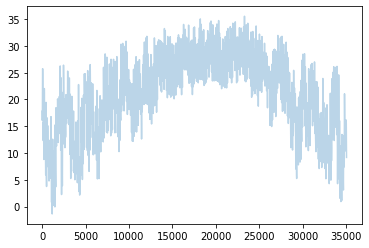

In [4]:
import matplotlib.pyplot as plt 
plt.plot(grid.weather.data['t_out'], alpha=0.3)

In [5]:
my_x = grid.net.bus_geodata.loc[grid.buildings['88CD4'].bus]['x']
my_y = grid.net.bus_geodata.loc[grid.buildings['88CD4'].bus]['y']
grid.net.bus_geodata['distance'] = (grid.net.bus_geodata['x']-my_x)**2 + (grid.net.bus_geodata['y']-my_y)**2

KeyError: '88CD4'